In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_openml
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/solar_weather[1].csv"
df=pd.read_csv(path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

In [ ]:
# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [ ]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [ ]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


In [ ]:
removeIndex = df[ (df['isSun'] == 0)].index
df.drop(removeIndex , inplace=True)
df.drop(columns=['isSun', 'SunlightTime/daylength', 'dayLength'], inplace=True)
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,weather_type,hour,month
29,2017-01-01 07:15:00,0,0.2,2.9,1016,100,6.1,0.0,0.0,98,15,4,7,1
30,2017-01-01 07:30:00,0,2.7,2.9,1016,100,6.1,0.0,0.0,98,30,4,7,1
31,2017-01-01 07:45:00,0,6.4,2.9,1016,100,6.1,0.0,0.0,98,45,4,7,1
32,2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,60,4,8,1
33,2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,75,4,8,1


In [ ]:
#Change dataframe index to datetime
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')

In [ ]:
#converting time data to time signal
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,
2017-01-01 07:15:00,0,0.2,2.9,1016,100,6.1,0.0,0.0,98,15,4,7,1,1.483255e+09
2017-01-01 07:30:00,0,2.7,2.9,1016,100,6.1,0.0,0.0,98,30,4,7,1,1.483256e+09
2017-01-01 07:45:00,0,6.4,2.9,1016,100,6.1,0.0,0.0,98,45,4,7,1,1.483257e+09
2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,60,4,8,1,1.483258e+09
2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,75,4,8,1,1.483258e+09


In [ ]:
day = 60 * 60 * 24  # Number of seconds in a day
year = 365.2425 * day  # Number of seconds in a year (considering leap years)

# Create new columns for sine and cosine transformations of time-related features
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))


In [ ]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 07:15:00,0,0.2,2.9,1016,100,6.1,0.0,0.0,98,15,4,7,1,1.483255e+09,0.946930,-0.321439,0.015561,0.999879
2017-01-01 07:30:00,0,2.7,2.9,1016,100,6.1,0.0,0.0,98,30,4,7,1,1.483256e+09,0.923880,-0.382683,0.015740,0.999876
2017-01-01 07:45:00,0,6.4,2.9,1016,100,6.1,0.0,0.0,98,45,4,7,1,1.483257e+09,0.896873,-0.442289,0.015919,0.999873
2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,60,4,8,1,1.483258e+09,0.866025,-0.500000,0.016098,0.999870
2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,75,4,8,1,1.483258e+09,0.831470,-0.555570,0.016277,0.999868


In [ ]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head(10)

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,
2017-01-01 07:15:00,0,0.2,2.9,1016,100,6.1,0.0,0.0,98,15,4,0.946930,-0.321439,0.015561,0.999879
2017-01-01 07:30:00,0,2.7,2.9,1016,100,6.1,0.0,0.0,98,30,4,0.923880,-0.382683,0.015740,0.999876
2017-01-01 07:45:00,0,6.4,2.9,1016,100,6.1,0.0,0.0,98,45,4,0.896873,-0.442289,0.015919,0.999873
2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,60,4,0.866025,-0.500000,0.016098,0.999870
2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,75,4,0.831470,-0.555570,0.016277,0.999868
2017-01-01 08:30:00,44,2.8,3.5,1016,99,6.0,0.0,0.0,98,90,4,0.793353,-0.608761,0.016457,0.999865
2017-01-01 08:45:00,61,3.1,3.5,1016,99,6.0,0.0,0.0,98,105,4,0.751840,-0.659346,0.016636,0.999862
2017-01-01 09:00:00,65,3.5,3.6,1016,97,6.2,0.0,0.0,100,120,4,0.707107,-0.707107,0.016815,0.999859
2017-01-01 09:15:00,83,3.8,3.6,1016,97,6.2,0.0,0.0,100,135,4,0.659346,-0.751840,0.016994,0.999856


In [ ]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]    0
GHI                 0
temp                0
pressure            0
humidity            0
wind_speed          0
rain_1h             0
snow_1h             0
clouds_all          0
sunlightTime        0
weather_type        0
day sin             0
day cos             0
year sin            0
year cos            0
dtype: int64

In [ ]:
df.index.min(),df.index.max()

(Timestamp('2017-01-01 07:15:00'), Timestamp('2022-08-31 17:30:00'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
X = df.drop(columns=['Energy delta[Wh]'])
y = df['Energy delta[Wh]']

# Specify the date for splitting
split_date = '2022-01-01'

# Split the datasets based on the date
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]

X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize variables to store RMSLE values and best k
best_rmsle = float('inf')
best_k = None
rmsle_values = []
# Lists to store values for plotting
k_values = list(range(1, 21))
error_values = []

#  Iterate over different values of k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    rmsle_values.append(rmsle)

    # Store error values for plotting
    error_values.append(1 - rmsle)  # 1 - RMSLE gives a value that can be considered as an error rate

    if rmsle < best_rmsle:
        best_rmsle = rmsle
        best_k = k


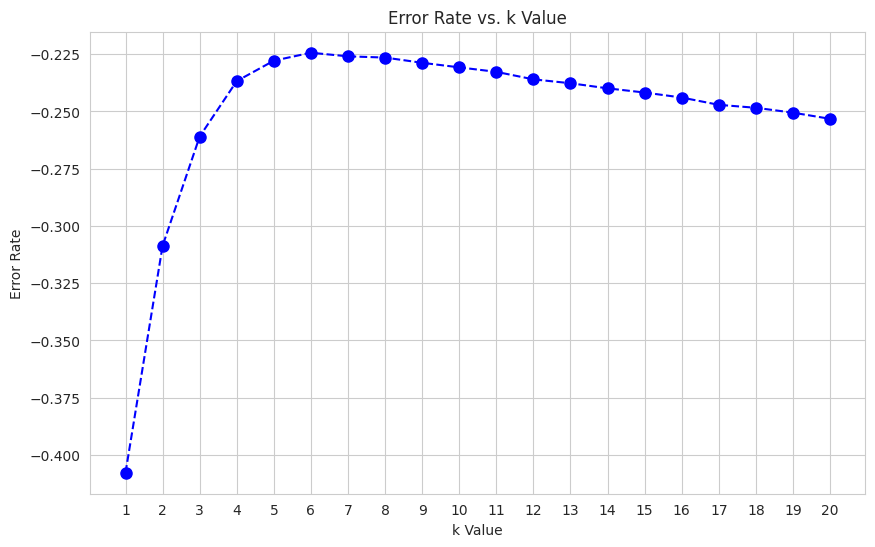

In [ ]:
# Plot the error rate vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_values, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.show()


In [ ]:
print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")


Best RMSLE: 1.2243616750058604, Best k: 6


In [ ]:
# Use the best k for KNeighborsRegressor
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Test the model on the testing data
y_test_predict = np.maximum(best_knn.predict(X_test_scaled), 0)

# Evaluate R-squared for the test set
r_squared_test = r2_score(y_test, y_test_predict)
print("Test R-squared:", r_squared_test)

Test R-squared: 0.809507577138574


In [ ]:
# Compare predicted values with actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})
print(comparison_df.head(50))

                     Actual   Predicted
Time                                   
2022-01-01 07:15:00       0    0.000000
2022-01-01 07:30:00       0    0.000000
2022-01-01 07:45:00       0    0.000000
2022-01-01 08:00:00       0    0.000000
2022-01-01 08:15:00      30    3.833333
2022-01-01 08:30:00      57   30.500000
2022-01-01 08:45:00      64   69.166667
2022-01-01 09:00:00      92   69.166667
2022-01-01 09:15:00      98   99.166667
2022-01-01 09:30:00     128  113.333333
2022-01-01 09:45:00     175  127.500000
2022-01-01 10:00:00     201   66.333333
2022-01-01 10:15:00     180   78.166667
2022-01-01 10:30:00     222  104.333333
2022-01-01 10:45:00     147  104.333333
2022-01-01 11:00:00     164  136.833333
2022-01-01 11:15:00     139  173.333333
2022-01-01 11:30:00     119  173.333333
2022-01-01 11:45:00     103  186.166667
2022-01-01 12:00:00     148  216.833333
2022-01-01 12:15:00     172  165.166667
2022-01-01 12:30:00      96  225.333333
2022-01-01 12:45:00      34  241.666667


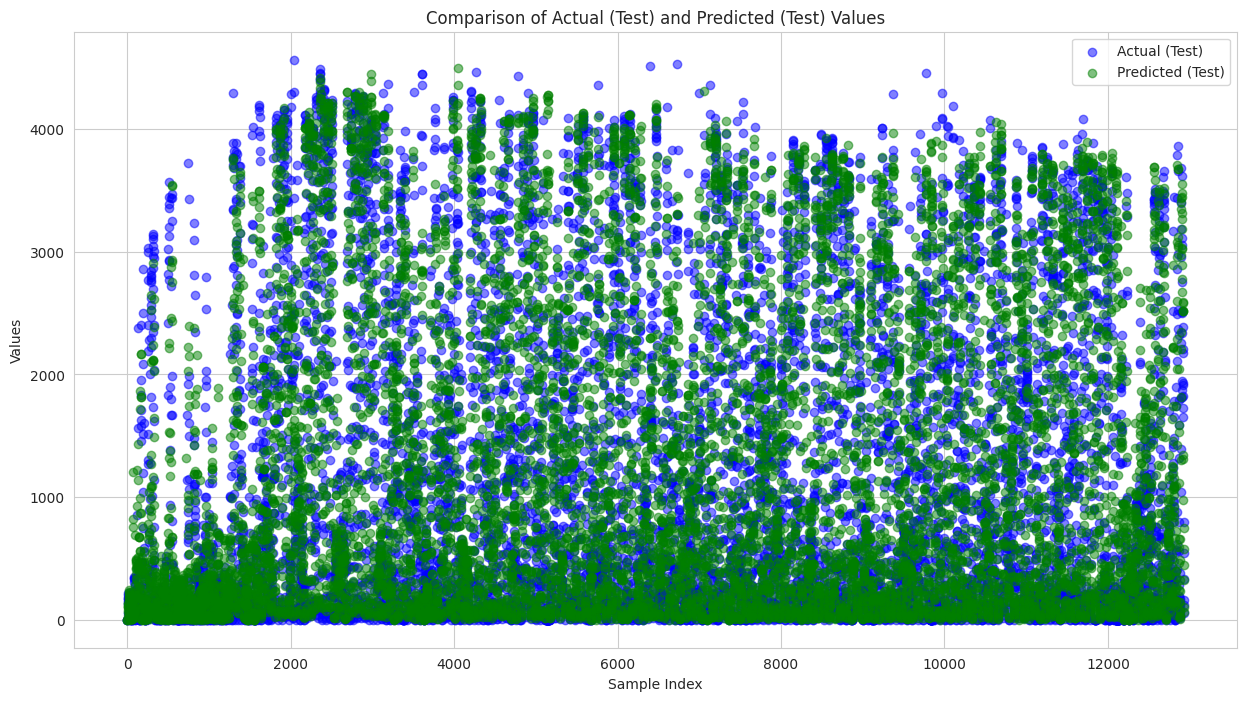

In [ ]:
# Sample 10000 points for visualization
sample_size = 10000
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)

# Scatter plot for comparison with different colors
plt.scatter(sample_indices, y_test.iloc[sample_indices], label='Actual (Test)', alpha=0.5, color='blue')
plt.scatter(sample_indices, y_test_predict[sample_indices], label='Predicted (Test)', alpha=0.5, color='green')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison of Actual (Test) and Predicted (Test) Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = best_knn.predict(X_train_scaled)

# Evaluate regression metrics on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R-squared: {r2_train}")

# Evaluate regression metrics on the test set
mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("\nTest Set Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R-squared: {r2_test}")


Training Set Metrics:
MAE: 168.3635519455819
MSE: 91511.34090507908
R-squared: 0.9390433397863674

Test Set Metrics:
MAE: 310.40896087830527
MSE: 305578.51159948803
R-squared: 0.809507577138574


In [ ]:

# Evaluate R-squared for the training set
y_train_pred = best_knn.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)


# Evaluate R-squared for the test set
r2_test = r2_score(y_test, y_test_predict)

# Print the results
print("Train Data Accuracy:")
print(f"R-squared (R²): {r2_train:.4f}")

print("\nTest Data Accuracy:")
print(f"R-squared (R²): {r2_test:.4f}")


Train Data Accuracy:
R-squared (R²): 0.9390

Test Data Accuracy:
R-squared (R²): 0.8095


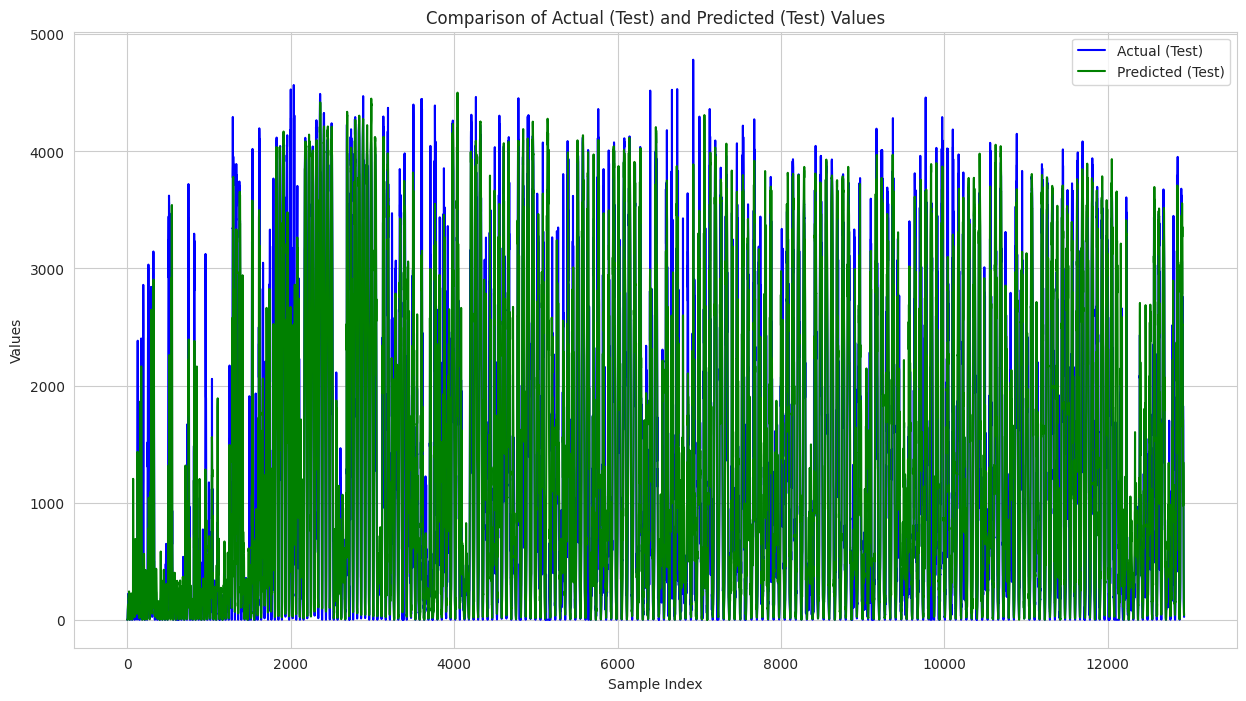

In [ ]:

# Create an array of sample indices for plotting
sample_indices = np.arange(len(y_test))

# Plot the actual values in blue
plt.plot(sample_indices, y_test, label='Actual (Test)', color='blue')

# Plot the predicted values in green
plt.plot(sample_indices, y_test_predict, label='Predicted (Test)', color='green')

# Set labels and title
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison of Actual (Test) and Predicted (Test) Values')

# Display a legend
plt.legend()

# Show the plot
plt.show()
